In [1]:
# Regular libraries for data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and separate into categorical and numerical

In [55]:
# Load data
raw_data = pd.read_csv("../../cleaned_data.csv", index_col = 0)

In [56]:
data = raw_data.copy()

In [57]:
# Separate categorical variables
cat_vars = ["payment_type", "start_weekday", "speed_category_pickup_start", "speed_category_dropoff_end", 
            "region_pickup", "region_dropoff", "tip_flag", "ride_type", "flag_overnight", "flag_weekend"]

In [58]:
num_vars = ["duration_seconds", "miles", "fare", "tip", "tolls", "extra_charges", "trip_total", 
            "speed_pickup_start", "bus_count_pickup_start", "gps_pings_pickup_start", "speed_dropoff_end", 
           "bus_count_dropoff_end", "gps_pings_dropoff_end", "total_no_tip", "start_month", "start_hour"]

In [59]:
# Check that all columns are accounted for
x = len(data.columns)
for var in data.columns:
    if var in cat_vars or var in num_vars:
        x = x - 1
if x == 0:
    print("OK")
else:
    print("Not OK")

OK


In [60]:
# Check that there are no extra variables
len(data.columns) == (len(cat_vars) + len(num_vars))

True

# Removing outliers

## Based on Duration

(array([ 943937., 1907618., 1218822.,  659785.,  348562.,  191465.,
         111281.,   66277.,   38892.,   22595.]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <a list of 10 Patch objects>)

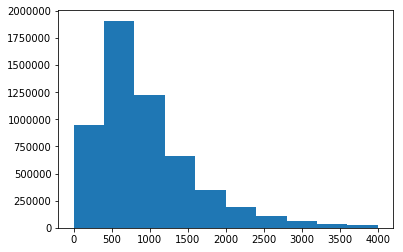

In [61]:
# Plot distribution for duration
plt.hist(data["duration_seconds"], range = (0,4000))

Anything above 4000 seconds of duration will be marked as outlier

In [62]:
data["outlier"] = data["duration_seconds"].apply(lambda x: x > 5000)

In [63]:
data[data["outlier"] == True].shape

(6330, 27)

In [64]:
data.drop(data[(data["outlier"] == True)].index, inplace = True)

In [65]:
data.shape

(5530292, 27)

## Based on Miles

(array([1951395., 1416023.,  786729.,  440788.,  254511.,  156526.,
         131714.,  103741.,  130615.,   98820.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

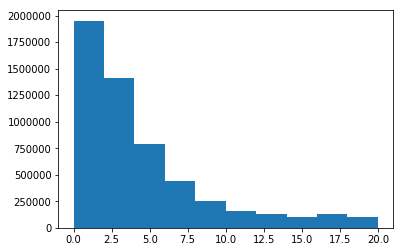

In [66]:
# Plot distribution for duration
plt.hist(data["miles"], range = (0,20))

Anything above 20 is an outlier

In [67]:
data["outlier"] = data["miles"].apply(lambda x: x > 20)

In [68]:
data[data["outlier"] == True].shape

(59430, 27)

In [69]:
data.drop(data[(data["outlier"] == True)].index, inplace = True)

In [70]:
data.shape

(5470862, 27)

## Based on Fare

(array([ 378411., 2585248.,  916937.,  792056.,  198785.,  239787.,
         143266.,   44515.,   51827.,   29313.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

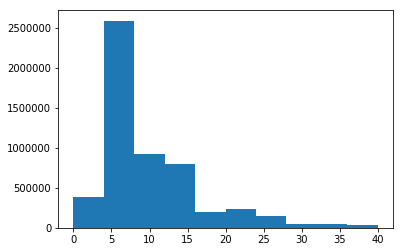

In [71]:
# Plot distribution
plt.hist(data["fare"], range = (0,40))

In [72]:
data["outlier"] = data["fare"].apply(lambda x: x > 40)
data[data["outlier"] == True].shape

(90717, 27)

In [73]:
data.drop(data[(data["outlier"] == True)].index, inplace = True)
data.shape

(5380145, 27)

## Based on Tip

(array([4234189.,  266031.,  378501.,  249925.,   59577.,  118134.,
          24116.,   18744.,   13471.,   12280.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

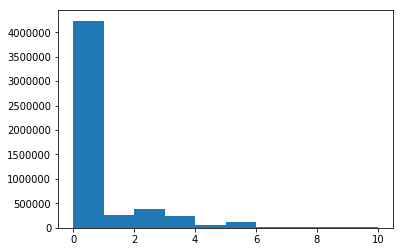

In [74]:
# Plot distribution
plt.hist(data["tip"], range = (0,10))

In [75]:
data["outlier"] = data["tip"].apply(lambda x: x > 10)
data[data["outlier"] == True].shape

(5177, 27)

In [76]:
data.drop(data[(data["outlier"] == True)].index, inplace = True)
data.shape

(5374968, 27)

## Based on Tolls

(array([5.37496e+06, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <a list of 10 Patch objects>)

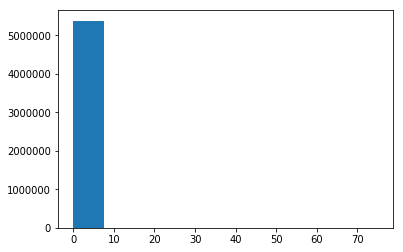

In [77]:
# Plot distribution
plt.hist(data["tolls"])

In [78]:
data.tolls.unique()

array([0.000e+00, 2.000e+00, 1.900e+00, 7.500e+01, 1.250e+01, 2.500e-01,
       1.311e+01, 3.000e-02, 1.500e+00, 4.000e+00, 5.000e+01, 3.000e+00,
       6.250e+01, 2.500e+01])

In [79]:
sum(raw_data["tolls"])

748.5799999999999

**Do not use tolls for analysis!**

## Based on Extra charges

(array([9.107340e+05, 1.370490e+05, 3.864739e+06, 4.282600e+04,
        2.815900e+04, 1.320400e+04, 2.116000e+03, 3.403250e+05,
        2.593600e+04, 4.435000e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

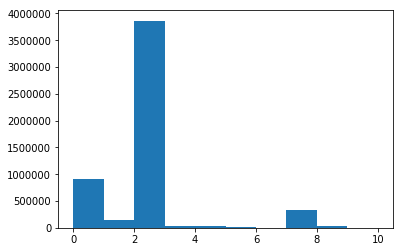

In [80]:
# Plot distribution
plt.hist(data["extra_charges"], range = (0,10))

In [81]:
data["outlier"] = data["extra_charges"].apply(lambda x: x > 10)
data[data["outlier"] == True].shape

(5445, 27)

In [82]:
data.drop(data[(data["outlier"] == True)].index, inplace = True)
data.shape

(5369523, 27)

## Based on trip_total

(array([  91927., 1862919., 1874758.,  777329.,  299707.,  159235.,
         131134.,   87208.,   50155.,   26736.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

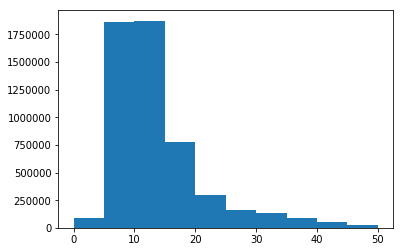

In [83]:
# Plot distribution
plt.hist(data["trip_total"], range = (0,50))

In [84]:
data["outlier"] = data["trip_total"].apply(lambda x: x > 50)
data[data["outlier"] == True].shape

(8415, 27)

In [85]:
data.drop(data[(data["outlier"] == True)].index, inplace = True)
data.shape

(5361108, 27)

## Based on speed_pickup_start

(array([  42237.,   27501.,   41661.,  197309.,  568407., 1523169.,
        1671970.,  991394.,  273876.,   20497.]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ]),
 <a list of 10 Patch objects>)

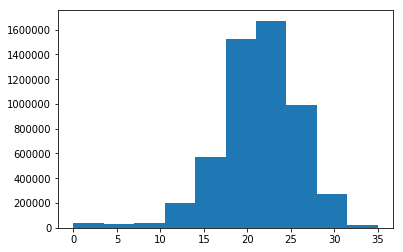

In [86]:
# Plot distribution
plt.hist(data["speed_pickup_start"], range = (0, 35))

In [87]:
data["outlier"] = data["speed_pickup_start"].apply(lambda x: x > 35)
data[data["outlier"] == True].shape

(3087, 27)

In [88]:
data.drop(data[(data["outlier"] == True)].index, inplace = True)
data.shape

(5358021, 27)

## Based on Speed Dropoff

(array([  53220.,   28657.,   36567.,  216609.,  574178., 1497770.,
        1646960.,  973310.,  305398.,   22493.]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ]),
 <a list of 10 Patch objects>)

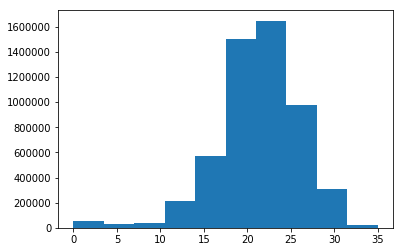

In [89]:
# Plot distribution
plt.hist(data["speed_dropoff_end"], range = (0, 35))

In [90]:
data["outlier"] = data["speed_dropoff_end"].apply(lambda x: x > 35)
data[data["outlier"] == True].shape

(2859, 27)

In [91]:
data.drop(data[(data["outlier"] == True)].index, inplace = True)
data.shape

(5355162, 27)

## Based on bus_count_pickup_start

(array([1338075., 1795981., 1049215.,  586848.,  263648.,  159717.,
          58943.,   56026.,   44691.,    2018.]),
 array([   0. ,  150.4,  300.8,  451.2,  601.6,  752. ,  902.4, 1052.8,
        1203.2, 1353.6, 1504. ]),
 <a list of 10 Patch objects>)

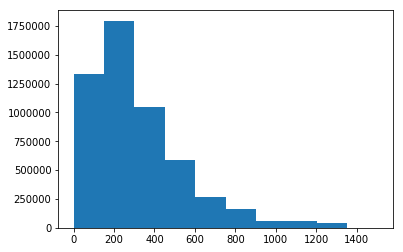

In [92]:
# Plot distribution
plt.hist(data["bus_count_pickup_start"])

No outliers

## Based on gps_pings_pickup_start

(array([1692412., 1838828.,  887714.,  502666.,  179147.,  122483.,
          60512.,   45144.,   23374.,    2882.]),
 array([    0. ,  2837.7,  5675.4,  8513.1, 11350.8, 14188.5, 17026.2,
        19863.9, 22701.6, 25539.3, 28377. ]),
 <a list of 10 Patch objects>)

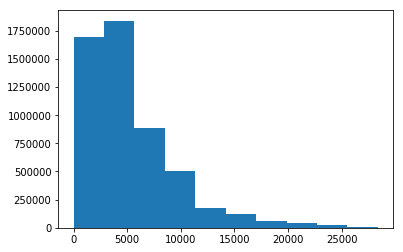

In [93]:
# Plot distribution
plt.hist(data["gps_pings_pickup_start"])

No outliers

## Based on bus_count_dropoff_end

(array([1383289., 1779404., 1021600.,  576846.,  263270.,  149217.,
          52450.,   67934.,   57755.,    3397.]),
 array([   0. ,  150.4,  300.8,  451.2,  601.6,  752. ,  902.4, 1052.8,
        1203.2, 1353.6, 1504. ]),
 <a list of 10 Patch objects>)

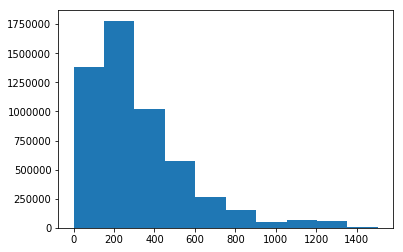

In [94]:
# Plot distribution
plt.hist(data["bus_count_dropoff_end"])

No outliers

## Based on gps_pings_dropoff_end

(array([1.722864e+06, 1.839028e+06, 8.575010e+05, 4.831720e+05,
        1.771640e+05, 1.232440e+05, 6.479100e+04, 5.804100e+04,
        2.775400e+04, 1.603000e+03]),
 array([    0. ,  2837.7,  5675.4,  8513.1, 11350.8, 14188.5, 17026.2,
        19863.9, 22701.6, 25539.3, 28377. ]),
 <a list of 10 Patch objects>)

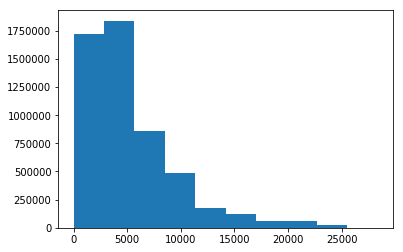

In [95]:
# Plot distribution
plt.hist(data["gps_pings_dropoff_end"])

No outliers

## Based on total_no tip

(array([  98735., 1976922., 1844252.,  742199.,  270051.,  158794.,
         135950.,   83921.,   35246.,    9092.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

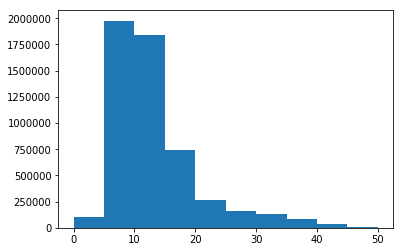

In [96]:
# Plot distribution
plt.hist(data["total_no_tip"])

No outliers

## Based on start month

(array([870591., 505418., 440008., 465911., 438603., 441665., 453136.,
        428302., 457269., 854259.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

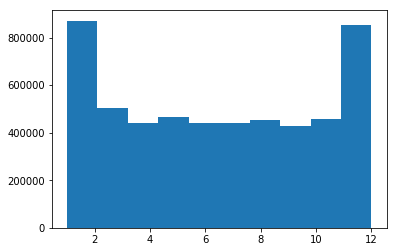

In [97]:
# Plot distribution
plt.hist(data["start_month"])

No outliers

## Based on start_hour

(array([388799., 112036., 176587., 719169., 459453., 498046., 821135.,
        722816., 657906., 799215.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

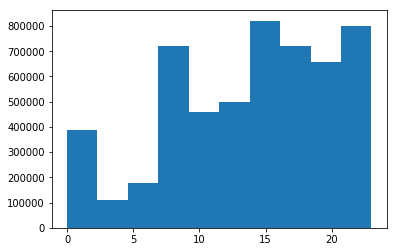

In [98]:
# Plot distribution
plt.hist(data["start_hour"])

No outliers

## Based on payment_type

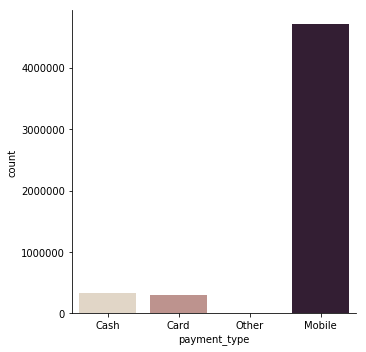

In [99]:
sns.catplot(x = "payment_type", kind="count", palette="ch:.25", data = data);

In [100]:
data.drop(data[(data["payment_type"] == 'Other')].index, inplace = True)
data.shape

(5348705, 27)

## Based on start_weekday

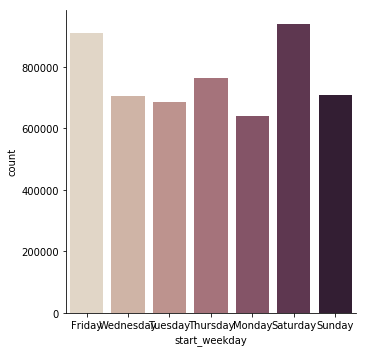

In [101]:
sns.catplot(x = "start_weekday", kind="count", palette="ch:.25", data = data);

## Based on speed_category_pickup_start

In [104]:
data.loc[(data["speed_category_pickup_start"] == 'slow'),'speed_category_pickup_start'] = "regular"

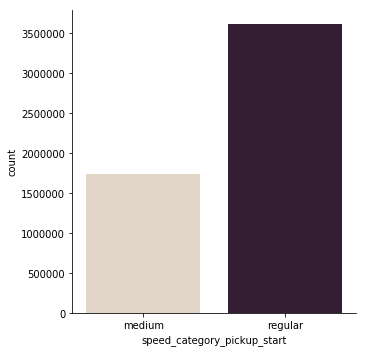

In [105]:
sns.catplot(x = "speed_category_pickup_start", kind="count", palette="ch:.25", data = data);

## Based on speed_category_dropoff_end

In [107]:
data.loc[(data["speed_category_dropoff_end"] == 'slow'),'speed_category_dropoff_end'] = "regular"

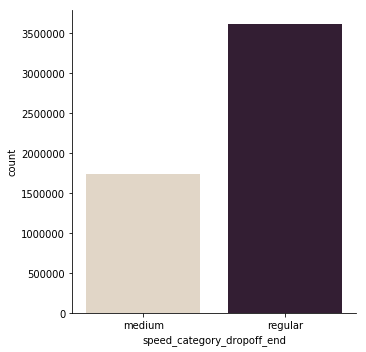

In [108]:
sns.catplot(x = "speed_category_dropoff_end", kind="count", palette="ch:.25", data = data);

## Based on tip_flag

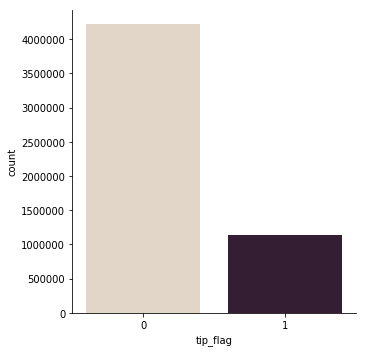

In [109]:
sns.catplot(x = "tip_flag", kind="count", palette="ch:.25", data = data);

## Based on flag_overnight

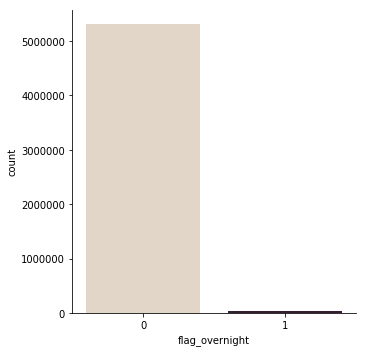

In [110]:
sns.catplot(x = "flag_overnight", kind="count", palette="ch:.25", data = data);

## Based on flag_weekend

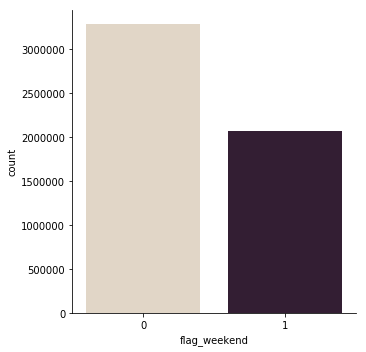

In [111]:
sns.catplot(x = "flag_weekend", kind="count", palette="ch:.25", data = data);

## Based on ride_type

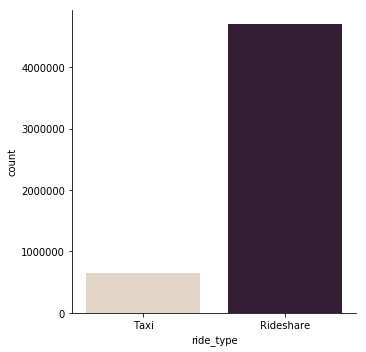

In [112]:
sns.catplot(x = "ride_type", kind="count", palette="ch:.25", data = data);

In [113]:
# Separate categorical variables
cat_vars = ["payment_type", "start_weekday", "speed_category_pickup_start", "speed_category_dropoff_end", 
            "region_pickup", "region_dropoff", "tip_flag", "ride_type", "flag_overnight", "flag_weekend"]

In [114]:
num_vars = ["duration_seconds", "miles", "fare", "tip", "trip_total", "speed_pickup_start", 
            "bus_count_pickup_start", "gps_pings_pickup_start", "speed_dropoff_end", 
           "bus_count_dropoff_end", "gps_pings_dropoff_end", "total_no_tip", "start_month", "start_hour"]

# Tipping Behaviour Summary

In [115]:
# Summary of tipping behaviour by ride type
tip_summary = data.groupby(["ride_type","tip_flag"], as_index = False)["duration_seconds"].count()
tip_summary.columns = ["ride_type","tip_flag", "Q"]
tip_summary

ride_type  tip_flag        Q
0  Rideshare         0  3854717
1  Rideshare         1   841359
2       Taxi         0   360163
3       Taxi         1   292466

In [116]:
# percentage of tippers in rideshare
tip_summary.iloc[1,2]/(tip_summary.iloc[0,2] + tip_summary.iloc[1,2])

0.179162134514007

In [117]:
# percentage of tippers in taxi
tip_summary.iloc[3,2]/(tip_summary.iloc[3,2] + tip_summary.iloc[2,2])

0.44813515795344677

# Convert regions

In [118]:
# Replace downtown data
data.replace(
    to_replace=['Downtown Lakefront', 'Near North',"Chicago Loop","West Town-Near West"],
    value='Downtown',
    inplace=True
)

In [119]:
# Replace south data
data.replace(
    to_replace=['Lincoln Park-Lake View', 
                'Hermosa-Logan Square',
                "Dunning-Portage-Belmont Cragn",
                "North Park-Albany-Linconl Sq",
                "Rogers Park - West Ridge",
               "Far North West",
               "Edge Water-Uptown",
               "Irving Park-Avondale-North Ctr"],
    value='North',
    inplace=True
)

In [120]:
# Replace west data
data.replace(
    to_replace=['Austin', 'Humboldt-Garfield Prk E/W',"Lawndale N/S","Bridgeport-McKinley-Lower West"],
    value='West',
    inplace=True
)

In [121]:
# Replace south data
data.replace(
    to_replace=['Near South-Douglas', 
                'Midway-Garfield Rdg-Clearing',
                "Fuller-Grand Blvd-Washington Park",
                "New City-Englewood-W Englewood",
                "Hyde Park-Kenwood-Woodlawn",
               "South West Side",
               "Ashburn",
               "Auburn Gresham-Chatham",
               "South Shore-S Chicago-Avlon",
               "South Deering-East Side",
               "Beverly-Mt Greenwood-Morgan Park",
               "Washington Hts-Roseland-Pullman",
               "Riverdale-Hegewisch"],
    value='South',
    inplace=True
)

In [122]:
#Check if the region is indeed clean
data.region_pickup.unique()

array(['Downtown', 'South', 'North', 'West'], dtype=object)

In [123]:
data.region_dropoff.unique()

array(['Downtown', 'North', 'South', 'West'], dtype=object)

## Distribution of region_pickup

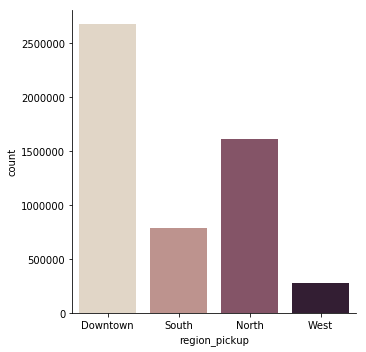

In [124]:
sns.catplot(x = "region_pickup", kind="count", palette="ch:.25", data = data);

## Distribution of region_dropoff

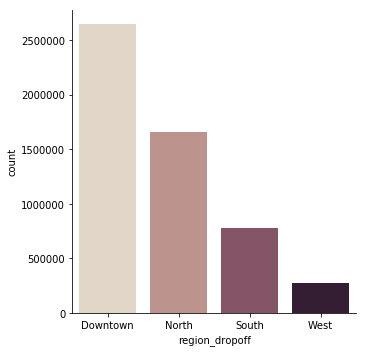

In [125]:
sns.catplot(x = "region_dropoff", kind="count", palette="ch:.25", data = data);

# Check final distributions

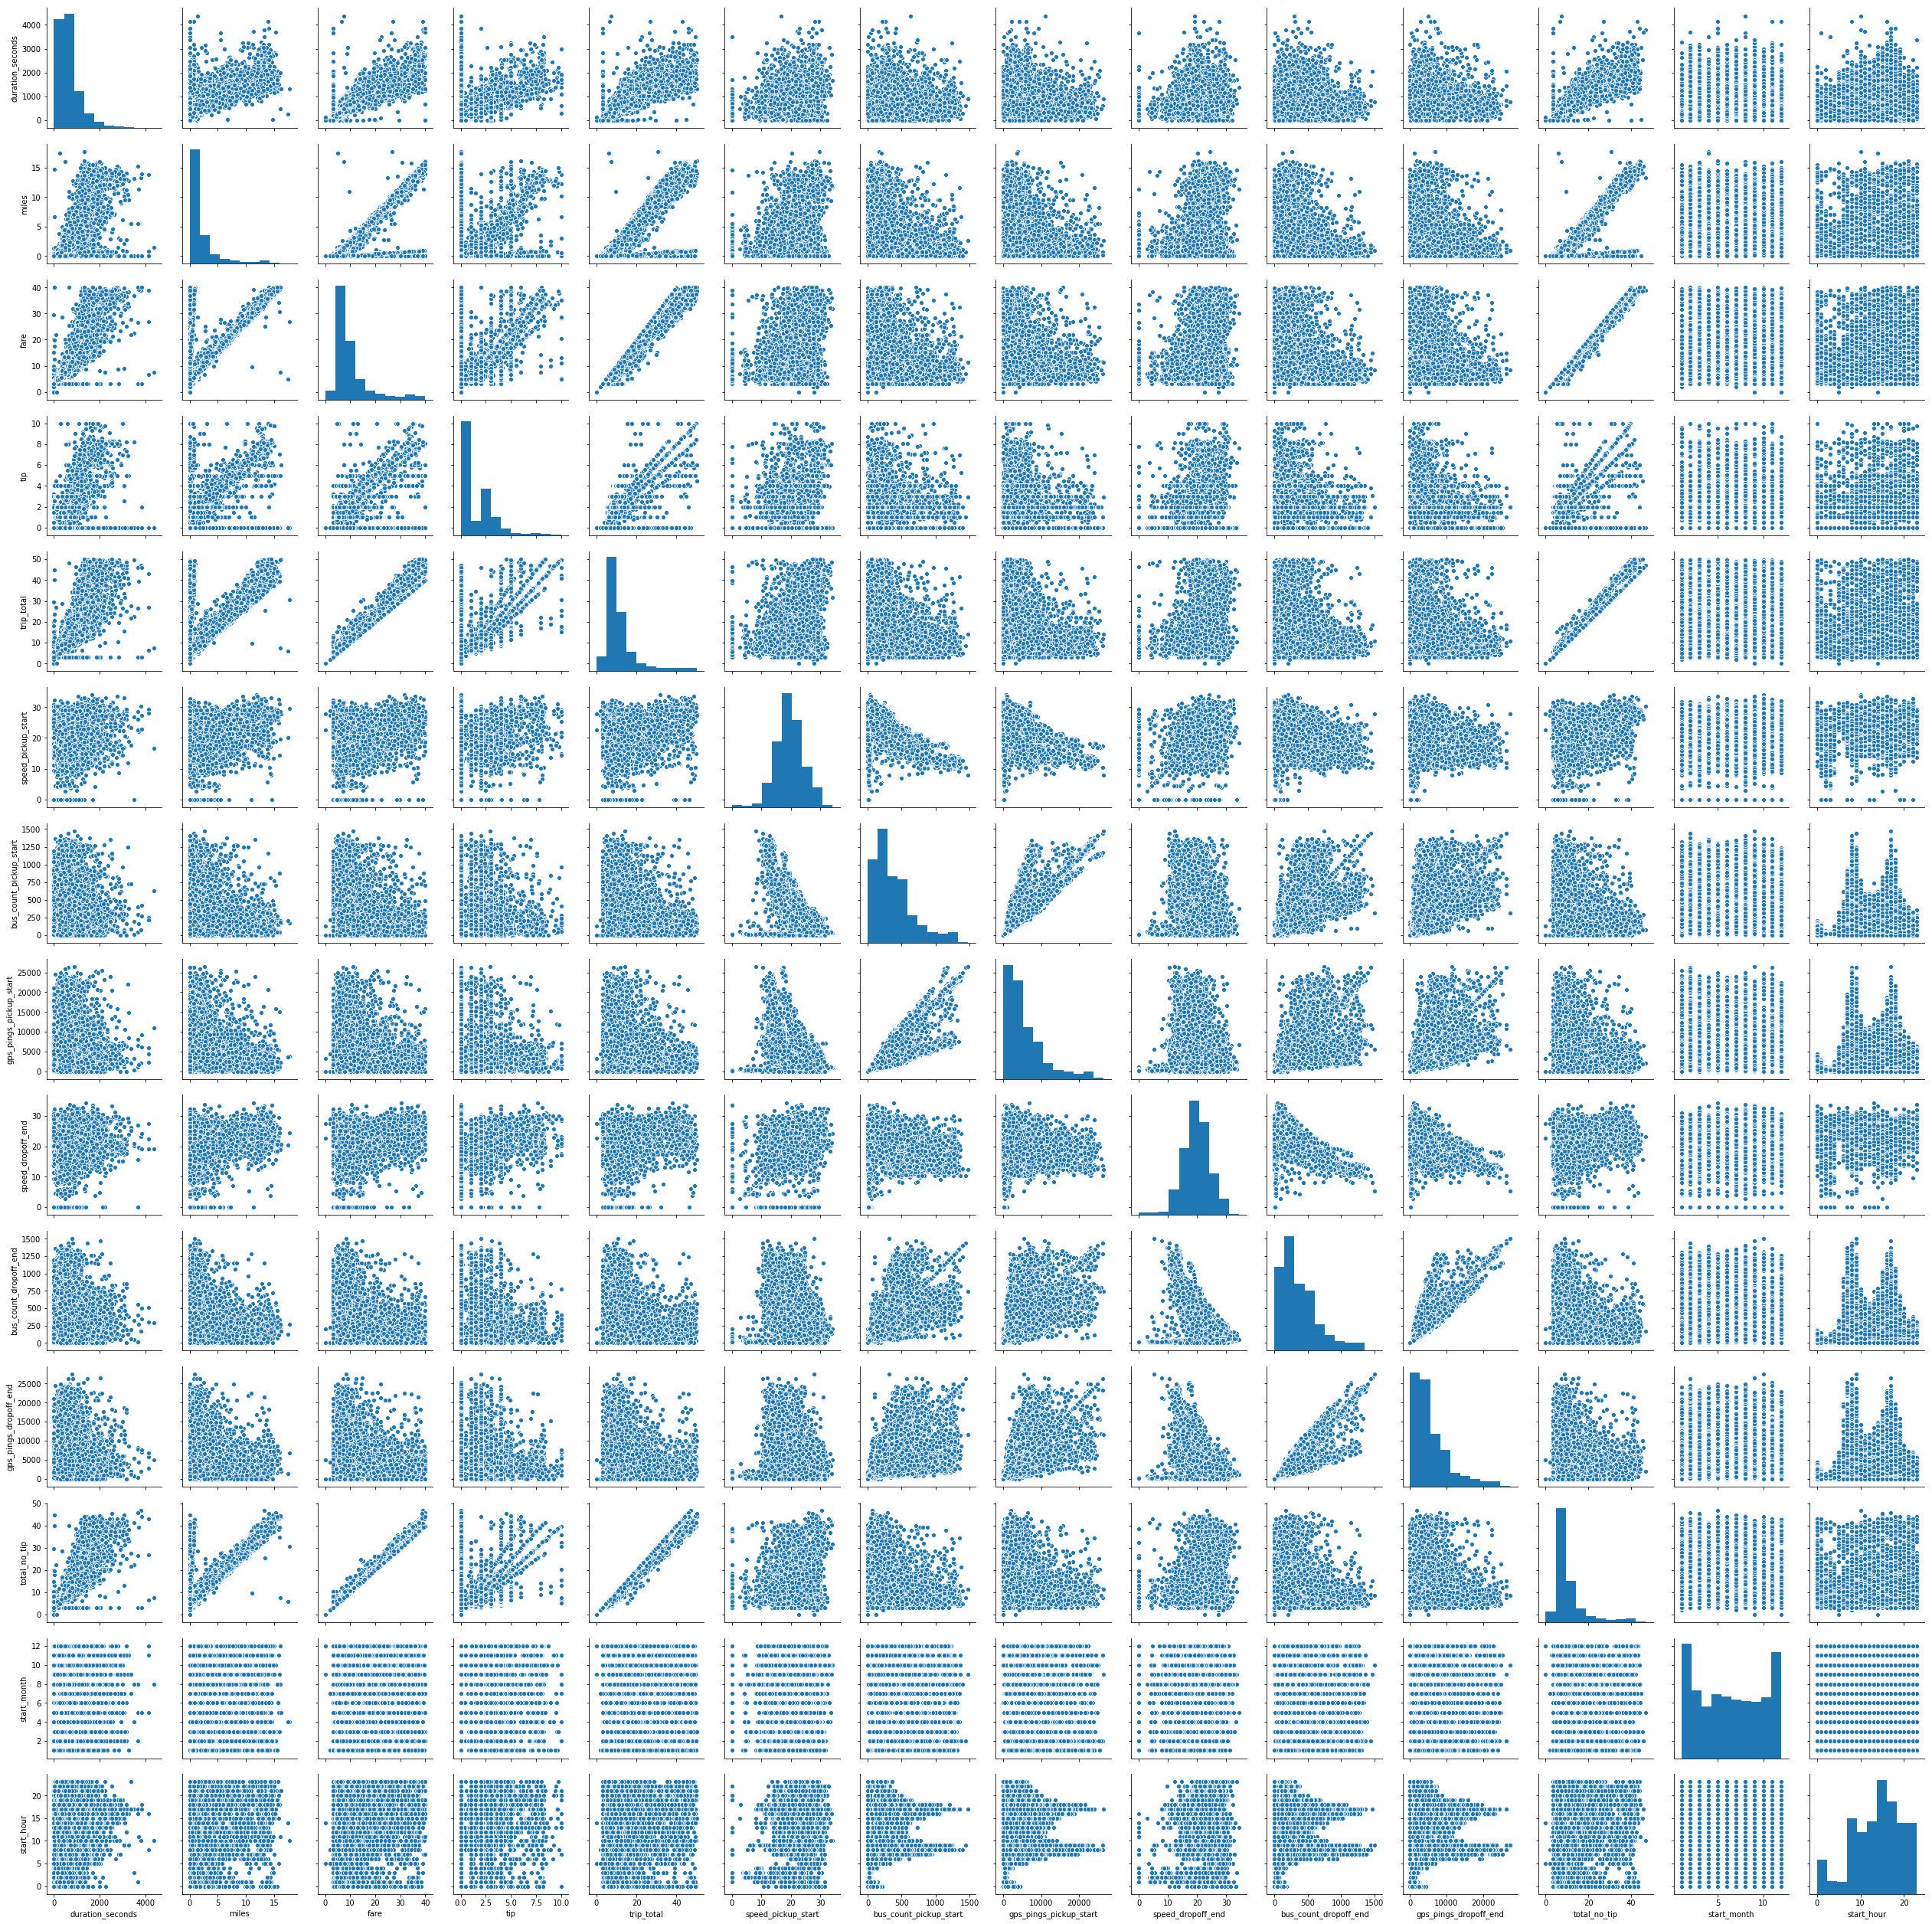

In [126]:
# Basic correlogram
sns.pairplot(data[num_vars].iloc[0:10000,])
plt.show()

# Create sample and export CSV

In [127]:
# Sample 500.000 rows
sample_data = data.sample(n = 500000, random_state = 232323)
len(sample_data)

500000

In [ ]:
sample_data.to_csv("../../tiny_sample.csv")